<a href="https://colab.research.google.com/github/pattichis/AI4All-Med/blob/main/Session_3_5_Loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss functions

# The self driving car problem

Consider the problem of developing a self-driving car.<br>
1. What do humans control when they drive a car?
2. What would like to have as input to the model?
3. What outputs do you need?


# Output constraints for self-driving cars

For each variable, consider the following:
1. Is it a single output True/False output?
2. Is it a continuous output over a finite range?
3. Does it have an infinite range?
4. How would you collect datasets using a game?
5. How would you collect datasets using actual cars?

# Predicting continuous variables

For the following problem, the true value is 1.
1. What is the loss function value when we achieve the true value?
2. Which loss function grows faster away from the true value?
3. What happens to both loss functions near the true value. Zoom in using the plot.

Suppose that we do not want rapid changes to the controls. For example, we do not want to turn the wheel too quikly. Which loss function would you use? Explain.

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import numpy as np

# Target value
y_true = torch.tensor([1.0])

# Predictions from 0 to 2
y_pred = torch.linspace(-6, 8, steps=1000)

# Calculate losses
mse = (y_pred - y_true).pow(2)  # MSE
mae = (y_pred - y_true).abs()   # L1

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_pred, y=mse, mode='lines', name='Mean Square Error'))
fig.add_trace(go.Scatter(x=y_pred, y=mae, mode='lines', name='Mean Absolute Error'))
fig.add_shape(
    type='line',
    x0=1, x1=1,
    y0=0, y1=max(mse),
    line=dict(color='red', dash='dash'),
    name='True value = 1'
)

fig.update_layout(title='Loss functions for continuous variables',
                  xaxis_title='Predicted value: y',
                  yaxis_title='Loss function',
                  hovermode='closest')
fig.show()


# Cross entropy for one output

Give examples when we only want to associate a probability of 1 output. Consider the case for Covid.

Note that we assume:
* For true label y=1, we want predicted probability p=1 (certainty).
* For true label y=0, we want predicted probability p=0 (opposite).

Note the properties of log(.):
* log(1)=0.
* log(p)<0 for p<1.
* 0*log(0) is zero.

We define the binary cross entropy using:
$$ \text{loss} = -y \log(p) + (y - 1) \log(1-p) $$
We plot the loss for a true label=1.<br>
Explain:
* What is the loss for the ideal scenario?
* What happens in the worst scenario?

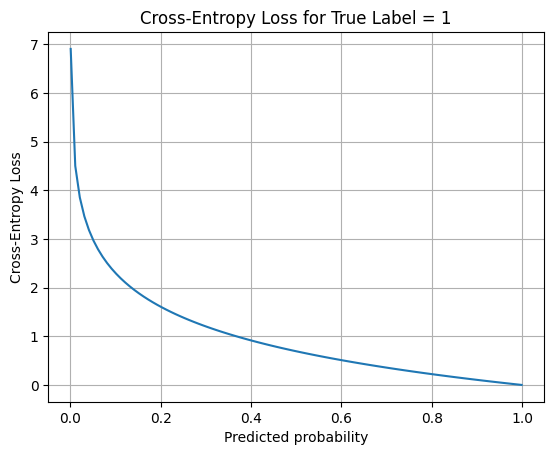

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

p = np.linspace(0.001, 0.999, 100)
y = 1
loss = - (y * np.log(p) + (1 - y) * np.log(1 - p))

plt.plot(p, loss)
plt.xlabel("Predicted probability")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss for True Label = 1")
plt.grid(True)
plt.show()


# Cross entropy for three categories

Give examples of having three categories that are mutually exclusive.

By mutually exclusive, we mean that we cannot have an input that belongs to two or more categories. Each input belongs to a single category.

For the following example, we assume that the correct category is 1.<br>
Experiment with different probabilities and answer:
1. When do you get a loss of zero? Explain.
2. When do you get a huge loss? Explain.
3. Give an example with a loss of about 3. Comment.
4. Give an example with a loss of about 4. Comment.

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def show_cross_entropy(p0, p1):
    p2 = 1.0 - p0 - p1
    if p2 < 0 or p2 > 1:
        print("Invalid combination: p0 + p1 must be <= 1.0")
        return

    probs = torch.tensor([[p0, p1, p2]])
    target = torch.tensor([1])  # class 1 is correct
    log_probs = torch.log(probs + 1e-9)  # avoid log(0)
    loss_fn = nn.NLLLoss()
    loss = loss_fn(log_probs, target)

    print(f"Predicted: {probs.tolist()[0]}")
    print(f"Cross-Entropy Loss: {loss.item():.4f}")

interact(show_cross_entropy,
         p0=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.1),
         p1=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.8))


interactive(children=(FloatSlider(value=0.1, description='p0', max=1.0, step=0.05), FloatSlider(value=0.8, des…

<function __main__.show_cross_entropy(p0, p1)>